# Miniproject Problem : Travel Planning Report

<img src="problem.PNG" width="600px">

หมายเหตุ : ในการตรวจสอบเวลาของแต่ละอัลกอริทึม ขออนุญาตใช้ฟังก์ชัน `time.sleep(1)` เพื่อวัดเวลาที่แม่นยำขึ้น \
โดยหลังจากวัดแล้วค่อยลบค่าออก จะทำให้ค่าแม่นยำขึ้น

# Algorithm 1 : Brute Force Algorithm

---

### แนวคิดในการทำ Brute-force algorithm ในการแก้ปัญหา

Brute-force Algorithm คืออัลกอริทึมที่ทำงานแบบทื่อๆและตรงๆ หาทุกความเป็นไปได้แล้วคำนวณว่าขั้นตอนไหนดีที่สุด <br> 
โดยที่หลักการในการแก้ปัญหา Travel Planning นี้เนื่องจากว่าเรามีทั้งหมด 10 เมืองที่ให้เลือก ดังนั้นเราจะทำการ Generate ความเป็นไปได้ในการเลือกเมืองทั้งหมดก่อน

<p style="color: aqua;">ขั้นตอนในการแก้ไขปัญหามีดังนี้</p>

1. Generate Permutations หรือความเป็นไปได้ทั้งหมดที่เราจะสามารถเลือกได้ ตั้งแต่เลือกเพียงเมืองเดียวถึงเลือกทั้งหมด

2. เราจะคำนวณโดยใช้เกณฑ์ในการตัดสินว่ารอบนั้นที่เลือกเมืองมาทั้งหมด มีวันที่เกิน 14 วันหรือไม่

3. ถ้าหากไม่เกิน จะพิจารณาเกณฑ์ของจำนวนเมืองที่มากที่สุดก่อน จากนั้นจึงค่อยพิจารณาค่า Cost รวมทีหลัง

เพียงเท่านี้ เราก็จะสามารถหารอบที่เลือกแล้วได้ไปเที่ยวจำนวนเมืองเยอะสุดและค่าใช้จ่ายต่ำสุด

In [2]:
import time
from itertools import combinations

def brute_force(cities, cost, days, day_limit):
    max_cities = []
    max_num_cities = 0
    min_cost = float('inf')
    
    # Generate all possible combinations of cities
    for r in range(1, len(cities) + 1):
        for subset in combinations(range(len(cities)), r):
            total_days = sum(days[i] for i in subset)
            if total_days <= day_limit:
                if len(subset) > max_num_cities:
                    max_num_cities = len(subset)
                    max_cities = list(subset)
                    min_cost = sum(cost[i] for i in subset)
                elif len(subset) == max_num_cities and sum(cost[i] for i in subset) < min_cost:
                    max_cities = list(subset)
                    min_cost = sum(cost[i] for i in subset)

    return max_cities, min_cost

cities = ["A", "B", "C", "D", "E","F", "G", "H", "I", "J"]
cost = [80, 85, 100, 45, 75, 25, 148, 205, 24, 200]
days = [3, 4, 5, 2, 3, 1, 6, 8, 1, 7]
day_limit = 14

start = time.time_ns()
selected_cities, selected_cost = brute_force(cities, cost, days, day_limit)
time.sleep(1)
end = time.time_ns()

print("Selected Cities:", [cities[i] for i in selected_cities])
print("Total cities:", len(selected_cities))
print("Total Days:", sum(days[i] for i in selected_cities))
print("Total Cost:", selected_cost)

brute_force_time = end - start - 1000000000
print('-' * 50)
print("Brute Force Time:", brute_force_time , "ns")

Selected Cities: ['A', 'B', 'D', 'E', 'F', 'I']
Total cities: 6
Total Days: 14
Total Cost: 334
--------------------------------------------------
Brute Force Time: 1740900 ns


### <p style="text-decoration: underline;">สรุปผล Brute-force algorithm</p>

### <p style="color: yellow;">คำตอบที่ได้คือ 6 เมือง 334 บาท คำตอบเดียว</p>

### <p style="color: yellow;">เวลาในการประมวลผล : O(n * 2^n)</p>

เนื่องจาก มี for loop 1 ชั้น และด้านในเป็น permutations ทำให้ผลลัพธ์ที่ได้ระยะเวลาประมาณ 500000 ns 

หมายเหตุ : เนื่องจาก ปริมาณข้อมูล Input มีจำนวนน้อยทำให้ไม่ค่อยเห็นระยะเวลาที่นานมาก

---

# Algorithm 2 : Greedy Algorithm

---

### แนวคิดในการทำ Greedy algorithm ในการแก้ปัญหา

Greedy algorithm คืออัลกอริทึมละโมภ โดยมีจุดเด่นคือ การเลือกสิ่งที่ดีที่สุดในแต่ละรอบ <br> 
โดยที่ไม่พิจารณาอนาคตหรือก็คือ ไม่ดูภาพรวมในอนาคตแล้วค่อยตัดสินใจ แต่เลือกสิ่งที่ดีที่สุดในรอบๆนั้น 

หลักการในแก้ปัญหา Travel Planning นี้เนื่องจากว่าเราต้องเลือกก่อนว่า อะไรจะเป็นปัจจัยในการพิจารณา \
เนื่องจากผมมองว่าถ้าหากเราใช้เกณฑ์เพียง Cost ที่น้อยที่สุดก่อนในการเลือก อาจจะไม่ได้ Optimal ที่สุดสำหรับ Greedy \
ผมจึงมองเป็น 2 Approach ในการพิจารณาคือ 

1. ใช้สูตรเพื่อพิจารณาทั้งสองตัวแปรพร้อมกัน เขียนเป็นสูตร cost / days <br> จากนั้นเรียงลำดับน้อยที่สุดแล้วค่อยเลือก (ในกรณีนี้ผมขอเรียกว่าเป็น value sort matrix)

2. ใช้ Cost ค่าใช้จ่ายที่น้อยที่สุดเรียงลำดับแล้วเลือก (ขอเรียกว่าเป็น cost sort matrix)

<p style="color: aqua;">ขั้นตอนในการแก้ไขปัญหามีดังนี้</p>

1. เลือก Approach ในการพิจารณาปัจจัย (value sort matrix / cost sort matrix)

2. สร้าง Matrix ที่คอยเรียงลำดับน้อยไปมาก แล้วจึงค่อยๆเลือกจากค่าที่น้อยที่สุดก่อน

3. ทำการเลือกแล้วรวมค่าใช้จ่ายและวันไปเรื่อยๆ ถ้าหากเลือกแล้วจะเกิน 14 วัน ก็จะทำการเลือกวันต่อไปแทน

4. เมื่อวนลูปจนหมด Matrix แล้ว เราก็จะได้เมืองที่เราเลือกและค่าใช้จ่าย โดยเลือกจากค่าที่ต่ำสุดก่อน

เพียงเท่านี้ เราก็จะสามารถหารอบที่เลือกแล้วได้ไปเที่ยวจำนวนเมืองเยอะสุดและค่าใช้จ่ายต่ำสุดใน Greedy เรียบร้อย

In [3]:
# Greedy-approach
# เนื่องจากเราต้องพิจารณา 2 ตัวแปรที่ต้อง Optimize คือ วันที่และ ราคา เราจึงสร้างสูตรการคำนวณขึ้นมา
# โดยสูตรคือ ราคา/วัน ซึ่งจะได้ค่าที่เราต้องการหา และเราจะเลือกตัวแปรที่มีค่าน้อยที่สุดก่อน

class GreedyAlgorithms:
    def __init__(self, cities, cost, days, max_days):
        self.cities = cities
        self.cost = cost
        self.days = days
        self.max_days = max_days

    # ในกรณีที่เราพิจารณาทั้งสองค่าพร้อมกัน จะเข้าสูตร
    def value_sort_matrix(self):
        value_matrix = []
        for i in range(len(self.cities)):
            # เนื่องจากเราพิจารณา 2 ตัวพร้อมกัน ก็ต้องใช้สูตรเพื่อพิจารณา
            value = self.cost[i] / self.days[i]
            value_matrix.append((self.cities[i], value))
        value_matrix = sorted(value_matrix, key=lambda x: x[1])
        return value_matrix
    
    # กรณีที่เราพิจารณาเฉพาะค่าราคาเป็นหลัก
    def cost_sort_matrix(self):
        value_matrix = []
        for i in range(len(self.cities)):
            value_matrix.append((self.cities[i], self.cost[i]))
        
        value_matrix = sorted(value_matrix, key=lambda x: x[1])
        return value_matrix

    def greedy(self, approach='value'):
        if approach == 'value':
            value_matrix = self.value_sort_matrix()
        elif approach == 'cost':
            value_matrix = self.cost_sort_matrix()

        total_days = 0
        total_cost = 0
        selected_cities = []

        for city, value in value_matrix:
            city_index = self.cities.index(city)
            city_day = self.days[city_index]
            city_cost = self.cost[city_index]

            if total_days + city_day <= self.max_days:
                selected_cities.append(city)
                total_days += city_day
                total_cost += city_cost

        self.visualize(selected_cities, total_days, total_cost)
    
    def visualize(self, selected_cities, total_days, total_cost):
        for city in selected_cities:
            city_index = self.cities.index(city)
            curr_day = self.days[city_index]
            curr_cost = self.cost[city_index]
            print(f"City: {city} | Days: {curr_day} | Cost: {curr_cost}")

        print(f"Total Days: {total_days}")
        print(f"Total Cost: {total_cost}")
        print("Total cities: ", len(selected_cities), "cities")

In [4]:
cities = ["A", "B", "C", "D", "E","F", "G", "H", "I", "J"]
cost = [80, 85, 100, 45, 75, 25, 148, 205, 24, 200]
days = [3, 4, 5, 2, 3, 1, 6, 8, 1, 7]
day_limit = 14

###  Approach 1 : ใช้สูตรในการคำนวณเพื่อพิจารณา 2 ตัวแปรพร้อมกัน ( cost / days )

In [5]:
import time

gd = GreedyAlgorithms(cities, cost, days, day_limit)


start = time.time_ns()
gd.greedy('value')
time.sleep(1)
end = time.time_ns()

greedy_value_time = end - start - 1000000000

print("Time : ", greedy_value_time , "ns")

City: C | Days: 5 | Cost: 100
City: B | Days: 4 | Cost: 85
City: D | Days: 2 | Cost: 45
City: I | Days: 1 | Cost: 24
City: F | Days: 1 | Cost: 25
Total Days: 13
Total Cost: 279
Total cities:  5 cities
Time :  1016900 ns


### Approach 2 : ใช้ค่าใช้จ่ายของเมืองที่น้อยกว่าเป็นตัวพิจารณา

In [6]:
start = time.time_ns()
gd.greedy('cost')
time.sleep(1)
end = time.time_ns()

greedy_cost_time = end - start - 1000000000

print("Time : ", greedy_cost_time , "ns")

City: I | Days: 1 | Cost: 24
City: F | Days: 1 | Cost: 25
City: D | Days: 2 | Cost: 45
City: E | Days: 3 | Cost: 75
City: A | Days: 3 | Cost: 80
City: B | Days: 4 | Cost: 85
Total Days: 14
Total Cost: 334
Total cities:  6 cities
Time :  882900 ns


### <p style="text-decoration: underline;">สรุปผล Greedy algorithm</p>

ในที่นี้จากการทดลอง เราจะเห็นว่าการใช้ Cost หรือค่าใช้จ่ายเป็นตัวพิจารณาและวัด จะได้ผลลัพธ์ที่ดีและเร็วกว่า

### <p style="color: yellow;">คำตอบที่ได้ (พิจารณา value) : 5 เมือง 279 บาท คำตอบเดียว</p>

### <p style="color: yellow;">คำตอบที่ได้ (พิจารณา cost) : 6 เมือง 334 บาท คำตอบเดียว</p>

### <p style="color: yellow;">เวลาในการประมวลผล : O(n log n)</p>

เนื่องจากเราจะต้อง Sorting matrix ในการพิจารณาก่อน ซึ่งโดยปกติ Python sorting built-in functions จะใช้ `Timsort algorithm` ซึ่งเป็น sorting algorithm ที่มาจาก merge sort และ insertion sort ทำให้มี Time Complexity มากสุดเป็น O(nlogn)

---

# Algorithm 3 : Dynamic Programming Algorithm

---

Dynamic Programming คือ เทคนิคอัลกอริทึมในการแก้ปัญหาที่มีความ Overlapping (ทับซ้อน) กันอยู่ ยกตัวอย่างเช่น การที่เราคำนวณค่านึงไปเรียบร้อยแล้ว<br> แต่มีการเรียกคำนวณซ้ำอีกรอบนึง ซึ่งถ้าหากเราใช้วิธีแบบธรรมดาอาจทำให้โปรแกรมเราทำงานช้าได้ เราจึงใช้เทคนิค <br> Dynamic Programming เพื่อวางแผนที่ทำให้ปัญหานั้นเป็นสูตรและไม่ทำให้การคำนวณมันซ้ำซ้อนกัน

จากปัญหานี้เราจะเห็นได้ว่าคล้ายกับ Knapsack problem

แต่เนื่องจากโดยปกติ Dynamic programming แบบ Knapsack คือการเอาค่าที่คุ้มที่สุดจากการใช้สมการ \
แล้วดูผลลัพธ์จากเมทริกซ์ด้านขวาล่าง แต่ในปัญหานี้ เราไม่สามารถเอาค่า cost มาพิจารณาได้ เพราะเราต้องการ \
ค่าใช้จ่ายน้อยที่สุดและคุ้มสุด ดังนั้นเราจึงต้องสร้างสมการสัดส่วนที่ทำให้มันคุ้มค่าก่อน โดยใช้สูตร `cost / day`

<p style="color: aqua;">ขั้นตอนในการแก้ไขปัญหา Dynamic Programming มีดังนี้</p>

1. เราจะสร้างเมทริกซ์ dp เพื่อพิจารณาค่าใช้จ่ายที่น้อยสุดและไปแวะเมืองได้มากสุด โดยที่ \
i (แถว) แทนด้วยจำนวนเมืองที่เลือกไปได้ และ j (หลัก) คือจำนวนวันที่สามารถค้างได้

2. ถ้าหากวันที่ต้องไปค้าง น้อยกว่าหรือเท่ากับ 14 (day limit) เราสามารถให้เมืองนั้นมาพิจารณาต่อได้

3. ใจความสำคัญอยู่ตรงเงื่อนไขสมการตรงนี้คือ `dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - days[i - 1]] + worthiness[i - 1])`
ก็คือเราจะคำนวณค่าระหว่างค่าปัจจุบันที่พิจารณา กับ ค่าหลักของเมืองก่อนหน้าเป็น days[i - 1] วัน บวกค่า worthiness ใหม่เข้าไป \ แล้วเทียบดูว่าอะไรคุ้มค่ากว่ากัน

4. ในกรณีที่เมืองนั้นต้องการวันมากกว่า day limit เราจะแทนค่า dp[i - 1][j] ไปเลยเพราะแสดงว่าไม่เอาเมืองนั้นมาคิดค่าความคุ้มค่า

5. หลังจากคำนวณวนลูปทุกอย่างเสร็จก็จะได้เมทริกซ์ความคุ้มค่ามา โดยเลือกตามการกำหนดค่า i, j และลดวันที่เอาตามด้านล่าง


In [7]:
import numpy as np
import time

def knapsack(cities, days, costs, max_days):
    n = len(cities)
    worthiness = [cost / day for cost, day in zip(costs, days)]  # หาสัดส่วนความคุ้มค่า
    # สร้างเมทริกซ์สำหรับเก็บค่าที่ได้จากการคำนวณ โดยแถวเป็นจำนวนเมืองที่เลือกและหลักเป็นจำนวนวันที่ใช้ได้
    dp = [[0] * (max_days + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, max_days + 1):
            if days[i - 1] <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - days[i - 1]] + worthiness[i - 1])  # ใช้ worthiness ในการพิจารณา
            else:
                dp[i][j] = dp[i - 1][j]

    selected_cities = []
    i, j = n, max_days # (10, 14)
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_cities.append(cities[i - 1])
            j -= days[i - 1]
        i -= 1

    # Calculate total cost of selected cities
    total_cost = sum(costs[cities.index(city)] for city in selected_cities)

    print(np.array(dp))

    return total_cost, selected_cities

cities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
days = [3, 4, 5, 2, 3, 1, 6, 8, 1, 7]
costs = [80, 85, 100, 45, 75, 25, 148, 205, 24, 200]
max_days = 14

start = time.time_ns()
min_cost, selected_cities = knapsack(cities, days, costs, max_days)
time.sleep(1)
end = time.time_ns()

dynamic_time = end - start - 1000000000
print("Minimum cost:", min_cost)
print("Selected cities:", selected_cities)

print('-' * 50)
print("Time : ", dynamic_time , "ns")

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          26.66666667  26.66666667
   26.66666667  26.66666667  26.66666667  26.66666667  26.66666667
   26.66666667  26.66666667  26.66666667  26.66666667  26.66666667]
 [  0.           0.           0.          26.66666667  26.66666667
   26.66666667  26.66666667  47.91666667  47.91666667  47.91666667
   47.91666667  47.91666667  47.91666667  47.91666667  47.91666667]
 [  0.           0.           0.          26.66666667  26.66666667
   26.66666667  26.66666667  47.91666667  47.91666667  47.91666667
   47.91666667  47.91666667  67.91666667  67.91666667  67.91666667]
 [  0.           0.          22.5         26.66666667  26.66666667
   49.16666667  49.16666667  49.16666667  49.16666667  70.41666667
   70.41666667  70.41666667  70.41666667  70.41666667  90.41666667]
 [  0.

### <p style="text-decoration: underline;">สรุปผล Dynamic Programming algorithm</p>

ในที่นี้จากการทดลอง เราจะเห็นได้ว่าการโค้ดใน Dynamic programming นั้นเป็นบรรทัดที่สั้น แต่ในเชิงการออกแบบ \
หรือการคิดวิเคราะห์สูตรนั้นค่อนข้างยากและใช้เวลานาน แต่ได้ผลลัพธ์ที่ออกมาดี

### <p style="color: yellow;">คำตอบที่ได้ : 6 เมือง 334 บาท คำตอบเดียว</p>

### <p style="color: yellow;">เวลาในการประมวลผล : O(n^2)</p>

เนื่องจากต้องสร้าง Matrix DP ขึ้นมาใช้ for loop 2 อันซ้อนกัน

---

# Algorithm 4 : Genetic algorithm

---

### แนวคิดในการทำ Genetic algorithm ในการแก้ปัญหา

Genetic algorithm คืออัลกอริทึมที่จำลองหลักการพันธุกรรมมาใช้ในการแก้ปัญหา Optimization <br>
โดยภาพรวมจะมีทั้งหมด 3 Phase สำหรับ Genetic Algorithm

<img src="GA.PNG" width="700px">

<p style="color: aqua;">ขั้นตอนในการแก้ไขปัญหามีดังนี้</p>

* Phase 1 : Initial Population
ทำการ Generate ประชากรตั้งต้นในตอนแรกโดยเงื่อนไขที่กำหนดใน Algorithm ของผมคือ<br>
ทำการสุ่มประชากรจำนวน 10 กลุ่มทางเลือก โดยที่แต่ละทางเลือก จะสุ่มจำนวนเมืองที่ไปซึ่ง <br>
สุ่มตั้งแต่ 2 - 6 เพื่อความคุ้มและเร็ว

* Phase 2 : Selection for breeding offsprings (ทำการสุ่มและให้กำเนิดรุ่นถัดไปให้ดีขึ้น)

  - 2.1 ทำการทดสอบ Fitness และเลือกสองคนที่มีค่าดีที่สุดมาเป็นพ่อแม่
  - 2.2 เราจะทำการเลือกพ่อแม่โดยการสุ่มด้วยวิธี Roulette Wheel selection ซึ่งหมายถึงทุกค่ามีโอกาสถูกสุ่มได้ เพียงแต่มีโอกาสที่ต่างกัน
  - 2.3 ทำการ Crossover ตัวพ่อแม่ที่ได้มา โดยในปัญหานี้ผมใช้วิธีการสุ่มจุดที่จะทำการ Crossover แล้วสลับส่วนนั้น
  - 2.4 ทำการ Mutation ตัวลูกตัวใดตัวหนึ่งโดยการสุ่ม
  - 2.5 เพิ่มตัวลูกเข้าไปในประชากร

* Phase 3 : Evaluation of a population (ทำการเช็คว่าดีหรือยัง)
ทำการเช็คค่า Fitness Function ในตัวลูกที่เกิดขึ้นมาใหม่ แล้ววนกลับไป Phase 2 ใหม่ จนกว่าที่เราจะได้ Optimal solution
โดยในปัญหานี้ ผมใช้วิธีการวัดว่าค่า Max fitness ที่เราได้ซ้ำกันเกิน 10 ก็จะถือว่า Optimal

สำหรับ Fitness Function ที่ทำในปัญหานี้ ผมคิดเป็น



$$
\text{days\_diff} = |\text{max\_days} - \text{total\_days}|
$$

$$
\text{days\_fitness} = \frac{1}{1 + \text{days\_diff}}
$$

$$
\text{cost\_fitness} = \frac{1}{\text{total\_cost}}
$$

$$
\text{city\_fitness} = \text{len(visited\_cities)}
$$

$$
\text{fitness} = \text{days\_fitness} \times \text{cost\_fitness} \times \text{city\_fitness}
$$

เพราะผมมองว่าในการที่เราจะคำนวณว่าปัจจัยไหนที่มีแล้วดีบ้าง เกิดจาก 
* cost fitness ที่น้อยจึงทำเป็นเศษส่วน
* days fitness ที่พยายามทำให้สิ่งที่เลือกเข้าใกล้กับ 14 วันมากที่สุด จึงใช้เป็น abs แล้วลบออก
* city fitness พยายามจะทำให้ทุก ๆ รอบมีจำนวนเมืองที่ไปมากที่สุด จึงคูณปกติ

In [8]:
import random

cities = {
    'A': {'days': 3, 'cost': 80},
    'B': {'days': 4, 'cost': 85},
    'C': {'days': 5, 'cost': 100},
    'D': {'days': 2, 'cost': 45},
    'E': {'days': 3, 'cost': 75},
    'F': {'days': 1, 'cost': 25},
    'G': {'days': 6, 'cost': 148},
    'H': {'days': 8, 'cost': 205},
    'I': {'days': 1, 'cost': 24},
    'J': {'days': 7, 'cost': 200},
}

def generate_population(population_size, max_cities, max_days):
    population = []
    # ทำการสุ่ม population เริ่มต้น
    for _ in range(population_size):
        # จำนวนเมืองที่จะสุ่ม ณ ตอนนั้น ซึ่งคิดว่าสุ่มตั้งแต่ 2 - max_cities จะคุ้มและเร็วที่สุด
        num_cities = random.randint(2, max_cities)
        curr_cities = []
        total_days = 0 
        count = 0 # Prevent the infinite loop
        while total_days < max_days and len(curr_cities) < num_cities:
            if count > 10:
                break
            # สุ่มเมืองที่จะไป
            city = random.choice(list(cities.keys()))
            if city in [c for c, _ in curr_cities]:
                count += 1
                continue
            days_to_stay = cities[city]['days']
            if total_days + days_to_stay > max_days:
                count += 1
                continue
            curr_cities.append((city, days_to_stay))
            total_days += days_to_stay
        population.append(curr_cities)
    return population

def fitness_function(select_cities):
    # คำนวณค่า fitness โดยคำนวณจาก จำนวนวันที่เข้าเมือง / ราคาทั้งหมด เพราะคิดว่าน่าจะคิดได้ง่าย
    total_days = 0
    total_cost = 0
    max_days = 14
    visited_cities = set()
    
    for city, days_to_stay in select_cities:
        total_days += days_to_stay
        total_cost += cities[city]['cost']
        visited_cities.add(city)
    
    days_diff = abs(max_days - total_days)
    days_fitness = 1 / (1 + days_diff)
    cost_fitness = 1 / total_cost
    city_fitness = len(visited_cities)
    
    return days_fitness * cost_fitness * city_fitness

def fitness_calculate(population):
    fitness_values = []
    for select_cities in population:
        fitness_values.append(fitness_function(select_cities))
    return fitness_values

# สำหรับเลือก Parent ในแต่ละรอบ
def roulette_wheel_selection(population, fitness_values, num_parents):
    parents = []
    total_fitness = sum(fitness_values)
    
    # Normalize ให้ค่า fitness อยู่ในช่วง 0-1 สำหรับค่าความน่าจะเป็น
    probs = []
    for value in fitness_values:
        probs.append(value / total_fitness)

    for _ in range(num_parents):
        index = random.choices(range(len(population)), weights=probs)[0]
        parents.append(population[index])

    return parents

# Crossover
def crossover(parent1, parent2):
    # สุ่มจุดที่จะทำการ crossover
    crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Mutation
def mutation(child, max_days):
    # สุ่มเมืองที่จะเข้าไปแทนที่เมืองเดิม
    index = random.randint(0, len(child) - 1)
    count = 0 # Prevent the infinite loop
    while True:
        if count > 10:
            break
        new_city = random.choice(list(cities.keys()))
        if new_city in [c for c, _ in child]:
            count += 1
            continue
        days_to_stay = cities[new_city]['days']
        # ถ้าเมืองที่สุ่มมา สามารถเข้าไปได้โดยไม่เกินจำนวนวันที่กำหนด
        total_days = sum([day for _, day in child])
        if total_days - child[index][1] + days_to_stay <= max_days:
            child[index] = (new_city, days_to_stay)
        else:
            break
        
    return child

In [9]:
import time

population_size = 10
max_cities = 5
max_days = 14

start = time.time_ns()

# Phase 1: Generate the initial population
init_population = generate_population(population_size, max_cities, max_days)
print(init_population)

iteration_population = init_population

# Phase 2: Selection for breeding offsprings (We will loop here until optimal solution)
curr_max_count = 0
curr_max_fitness = 0

while True:
    # Individuals test for fitness
    fitness_values = fitness_calculate(iteration_population)


    if curr_max_count == 15:
        break

    # Check whether the optimal solution is found
    if max(fitness_values) > curr_max_fitness:
        curr_max_fitness = max(fitness_values)
        curr_max_count = 0
    else:
        curr_max_count += 1

    # Selection for reproduction

    num_parents = 2  # Number of parents to select for crossover
    selected_parents = roulette_wheel_selection(iteration_population, fitness_values, num_parents)
    print("Selected Parents:")
    for parent in selected_parents:
        print(parent)

    # Reproduction (Crossover & Mutation)
    offspring = []
    parent1 = selected_parents[0]
    parent2 = selected_parents[1]
    child1, child2 = crossover(parent1, parent2)
    n = random.randint(0, 1)
    offspring.append(mutation(child1, max_days))
    offspring.append(mutation(child2, max_days))
    
    iteration_population = offspring + iteration_population

# Phase 3 : Evaluation of a population
final_fitness_values = fitness_calculate(iteration_population)
print(final_fitness_values)

max_value = 0
final_index = 0
for index, value in enumerate(final_fitness_values):
    if value > max_value:
        max_value = value
        final_index = index

final_selected = iteration_population[final_index]

time.sleep(1)
end = time.time_ns()

[[('G', 6), ('D', 2), ('B', 4)], [('B', 4), ('E', 3)], [('C', 5), ('H', 8), ('I', 1)], [('G', 6), ('H', 8)], [('E', 3), ('A', 3)], [('F', 1), ('E', 3), ('J', 7), ('I', 1), ('D', 2)], [('G', 6), ('E', 3), ('C', 5)], [('I', 1), ('H', 8)], [('A', 3), ('D', 2)], [('B', 4), ('A', 3), ('J', 7)]]
Selected Parents:
[('C', 5), ('H', 8), ('I', 1)]
[('A', 3), ('D', 2)]
Selected Parents:
[('C', 5), ('H', 8), ('I', 1)]
[('G', 6), ('E', 3), ('C', 5)]
Selected Parents:
[('G', 6), ('H', 8)]
[('G', 6), ('J', 7), ('I', 1)]
Selected Parents:
[('G', 6), ('J', 7), ('I', 1)]
[('F', 1), ('E', 3), ('J', 7), ('I', 1), ('D', 2)]
Selected Parents:
[('C', 5), ('J', 7), ('I', 1)]
[('G', 6), ('E', 3), ('C', 5)]
Selected Parents:
[('G', 6), ('D', 2), ('B', 4)]
[('G', 6), ('J', 7), ('I', 1)]
Selected Parents:
[('I', 1), ('D', 2), ('B', 4)]
[('C', 5), ('H', 8), ('I', 1)]
Selected Parents:
[('G', 6), ('E', 3), ('C', 5)]
[('G', 6), ('J', 7), ('I', 1)]
Selected Parents:
[('G', 6), ('J', 7), ('I', 1)]
[('G', 6), ('E', 3),

In [10]:
total_cost = 0
total_days = 0

print('-' * 50)
print("Final Selected:")

for city, day in final_selected:
    total_cost += cities[city]['cost']
    total_days += day
    print(f"City: {city} - Days: {day}")

print("Total Cost: ", total_cost)
print("Total Days: ", total_days)

GA_time = end - start - 1000000000

print("Time : ", GA_time , "ns")

--------------------------------------------------
Final Selected:
City: F - Days: 1
City: E - Days: 3
City: J - Days: 7
City: I - Days: 1
City: D - Days: 2
Total Cost:  369
Total Days:  14
Time :  1824900 ns


### <p style="text-decoration: underline;">สรุปผล Genetic algorithm</p>

ในที่นี้จากการทดลอง เราจะเห็นว่าการใช้ Cost หรือค่าใช้จ่ายเป็นตัวพิจารณาและวัด จะได้ผลลัพธ์ที่ดีและเร็วกว่า

### <p style="color: yellow;">คำตอบที่ได้ : อยู่ระหว่าง 4-5 เมือง ค่าใช้จ่าย 200-380 บาท</p>

### <p style="color: yellow;">เวลาในการประมวลผลประมาณ : 2682100 ns</p>

ส่วนเวลาที่ประมวลผลไม่ชัดเจนเนื่องจากใช้ While True เพื่อหา Optimal Solution ทำให้เวลาที่ได้ไม่คงที่

---

## สรุปผลการทดลองจากทั้ง 4 อัลกอริทึม

Brute force :  1740900
Greedy :  882900
Dynamic :  1483000
Genetic Algorithm :  1824900


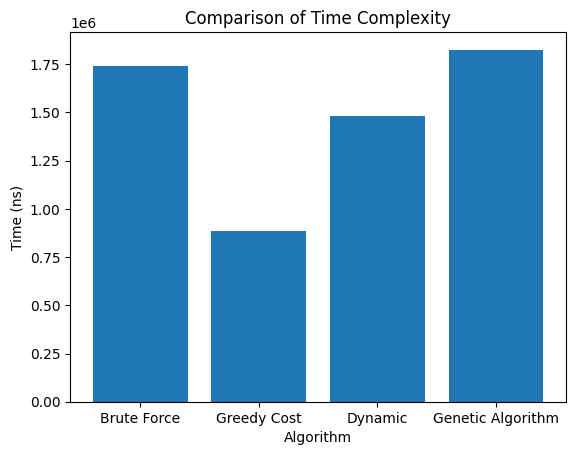

In [13]:
print('Brute force : ', brute_force_time)
print('Greedy : ', greedy_cost_time)
print('Dynamic : ', dynamic_time)
print('Genetic Algorithm : ', GA_time)

# Data visualization
import matplotlib.pyplot as plt

x = ['Brute Force', 'Greedy Cost', 'Dynamic', 'Genetic Algorithm']
y = [brute_force_time, greedy_cost_time, dynamic_time, GA_time]

plt.bar(x, y)
plt.xlabel('Algorithm')
plt.ylabel('Time (ns)')
plt.title('Comparison of Time Complexity')
plt.show()

จากการทดลองทั้งหมด เราจะสามารถเห็นเวลาที่ใช้จากทั้ง 4 อัลกอริทึมได้ แต่มีข้อสรุปที่เห็นได้ดังนี้

* Brute Force Algorithm
  - เนื่องจาก Input ของเราไม่ได้มากเกินไป ทำให้เวลาของ Brute Force <br> ไม่ได้เยอะจนเกินไปเมื่อเทียบกับอัลกอริทึมอื่นในปัญหานี้ อีกทั้งยังได้คำตอบที่ Optimal ที่สุด <br>
  - การเขียนโปรแกรมถือว่าใช้เวลาไม่นาน เนื่องจากเป็นอัลกอริทึมที่มีวิธีการที่ง่าย

* Greedy Algorithm
  - ใช้เวลาในการรันเร็วที่สุด แต่มีข้อสังเกตคือ Greedy <br> เราสามารถเลือกตัวที่เราพิจารณาได้
ทั้งค่าใช้จ่ายที่น้อยที่สุดก่อน หรือ ค่าความคุ้มค่าที่ได้จากการคำนวณ (cost / days) <br>
  - ทำให้ Greedy อาจจะเป็นอัลกอริทึมที่เหมาะสมที่สุดสำหรับปัญหานี้ เนื่องจากได้ Optimal Solution 
  - แต่ในปัญหาอื่นอาจจะทำให้ผลลัพธ์ไม่การันตีว่าจะดีที่สุด ฉะนั้นต้องพิจารณาในส่วนนี้
  - การเขียนโปรแกรมใช้เวลาสั้นที่สุด เนื่องจากเป็นแค่การเรียงลำดับน้อยไปมาก แล้วเลือกทันที

* Dynamic Programming Algorithm
  - ใช้เวลาในการรันเร็วรองลงมาจาก Greedy
  - การเขียนโปรแกรมใช้เวลานาน ถึงแม้จะดูเขียนง่าย แต่การคิดสมการให้เหมาะสมกับปัญหาใช้เวลาออกแบบที่ค่อนข้างนาน
  - ใช้การประยุกต์จาก Knapsack problem โดยคิดเป็นสัดส่วนความคุ้มค่าแทน

* Genetic Algorithm (GA)
  - ใช้เวลารันไม่แน่นอนอาจจะนานกว่า
  - การเขียนโปรแกรมใช้เวลานานที่สุด เนื่องจากมีจำนวนบรรทัดที่เยอะและออกแบบยาก
  - กระบวนการออกแบบ GA ในแต่ละขั้นตอน ตั้งแต่กำหนดประชากร, Fitness Function, Crossover, Mutation ใช้เวลาออกแบบนาน
  - การรันในแต่ละรอบไม่การันตี Optimal Solution
  - คล้ายกับการปรับค่า Hyperparameter ในการเทรน AI

<hr><br>
<div style="text-align:center;">
    <b>เป็นคนไม่เอาถ่านบ้านมีเตาแก๊ส</b>
    <p style="color: greenyellow;">ศวิษฐ์ โกสียอัมพร 65070506026</p>
    <p style="color: orange">ธวัลรัตน์ โรจน์อมรรัตน์ 65070506037</p>
    <p style="color: hotpink;">ปุญชญา จันทร์เจริญ 65070506039</p>
</div>